# Ford GoBike System Dataset Exploration
## by Hope Ugwuabanachi

## Introduction
> This data set includes information regarding 183412 individual rides made in a bike-sharing system covering the greater San Francisco Bay area. Some of the data features includes duration_sec, start_time, end_time, member_gender and other additional variables.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# import the dataset
df_ford = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
# check the dimensions
df_ford.shape

(183412, 16)

In [5]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


### What is the structure of your dataset?

> The dataset contains 183412 rows with 16 columns 
> summary of the dtypes include:

float64(7),
int64(2),
object(7).
    
Therefore, most variables are numeric

### What is/are the main feature(s) of interest in your dataset?

> Features of interest in this dataset are member_gender, duration_hrs, member_birth_year, start_time. I'm interested in how these features are best for predicting the type of users that come for program trips.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Some of the features that will help support my investigation are user_type, duration_sec, bike_share_for_all_trip, member_birth_year, member_gender and start_time.


## More exploration to begin my investigation

##### some missing values exists in some columns

In [6]:
# check the number of missing values
df_ford.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

##### like 6 columns have missing values

In [7]:
# drop all null values
df_ford.dropna(inplace=True)

In [8]:
# confirm if all null values have been dropped
df_ford.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

###### all null values have been removed

In [9]:
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


In [10]:
# check for the descriptive statistics for each column
df_ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [11]:
#checking for duplicates
sum(df_ford.duplicated())

0

##### no duplicates were found


In [12]:
# change the dtype of user_type, member_gender, bike_id
df_ford["user_type"] = df_ford.user_type.astype("category")
df_ford["member_gender"] = df_ford.member_gender.astype("category")
df_ford["bike_id"] = df_ford.bike_id.astype(str)

In [13]:
# confirm changes
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
dtypes: category(2), float64(7), int64(1), object(6)
memory usage: 20.4+ MB


In [14]:
# create age column
df_ford["age"] = 2019 - df_ford["member_birth_year"]

In [15]:
df_ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35.0
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47.0
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30.0
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45.0
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60.0


In [16]:
df_ford["start_time"] = pd.to_datetime(df_ford["start_time"])
df_ford["end_time"] = pd.to_datetime(df_ford["end_time"])

In [17]:
# Create columns for day and hour from the start time column
df_ford["start_day"] = df_ford["start_time"].dt.day_name()
df_ford["hour"] = df_ford["start_time"].dt.hour

In [18]:
df_ford.start_day.value_counts()

Thursday     33712
Tuesday      30584
Wednesday    28426
Friday       27663
Monday       25641
Sunday       14512
Saturday     14414
Name: start_day, dtype: int64

In [19]:
df_ford.hour.value_counts().count()

24

In [20]:
#check the dtype of the age column
df_ford["age"].dtype

dtype('float64')

In [21]:
# change the age column to int64
df_ford["age"] = df_ford["age"].astype('int64')

In [22]:
# confirm changes
df_ford["age"].dtype

dtype('int64')

In [23]:
df_ford.head(5)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_day,hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35,Thursday,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47,Thursday,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30,Thursday,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45,Thursday,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60,Thursday,23


**To make the time more usable, i need to change the duration_sec to minutes and hours**

In [24]:
df_ford["duration_mins"] = df_ford["duration_sec"]/60
df_ford["duration_hrs"] = df_ford["duration_sec"]/3600

In [25]:
# confirm the changes for minutes
df_ford.duration_mins.head()

0     869.750000
2    1030.900000
3     608.166667
4      26.416667
5      29.883333
Name: duration_mins, dtype: float64

In [26]:
# confirm the changes for hours
df_ford.duration_hrs.head()

0    14.495833
2    17.181667
3    10.136111
4     0.440278
5     0.498056
Name: duration_hrs, dtype: float64

In [27]:
# change the duration_min & duration_hrs to int64
df_ford["duration_mins"] = df_ford["duration_mins"].astype('int64')
df_ford["duration_hrs"] = df_ford["duration_hrs"].astype('int64')


In [28]:
# confirm the changes 
df_ford.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 21 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null object
user_type                  174952 non-null category
member_birth_year          174952 non-null float64
member_gender              174952 non-null category
bike_share_for_all_trip    174952 non-null object
age                        174952 non-null int64
start_day     

In [29]:
# confirm the changes for minutes
df_ford.duration_mins.head()

0     869
2    1030
3     608
4      26
5      29
Name: duration_mins, dtype: int64

In [30]:
# confirm the changes for hours
df_ford.duration_hrs.head()

0    14
2    17
3    10
4     0
5     0
Name: duration_hrs, dtype: int64

## Univariate Exploration

### Question 1: What is the distribution of users' ages ?

Text(0.5,1,'User Distribution by Age')

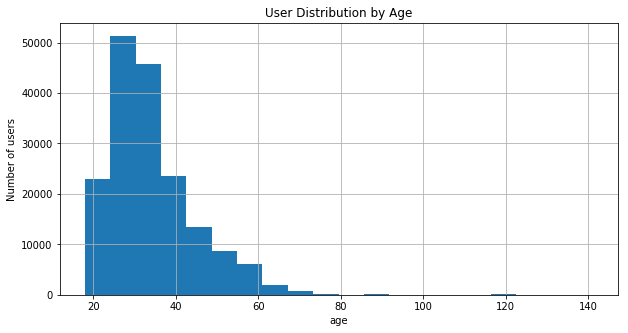

In [31]:
plt.figure(figsize=[10,5])
df_ford["age"].hist(bins = 20)
plt.xlabel('age')
plt.ylabel("Number of users")
plt.title("User Distribution by Age")

**From the chart above, majority of the users ages are between 24 and 38**

### Question 2: What is the distribution of user's for bike_share_for_all_trip?

Text(0.5,1,'Users Distribution Based on Trips Program')

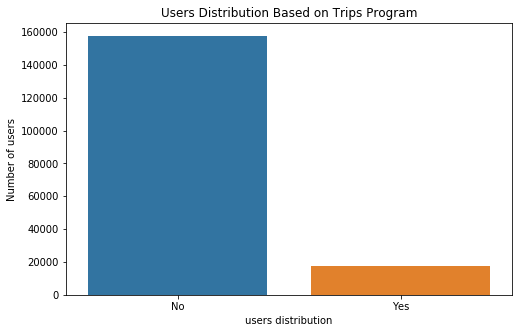

In [32]:
plt.figure(figsize=[8,5])
sb.countplot(data=df_ford, x="bike_share_for_all_trip")

plt.xlabel("users distribution")
plt.ylabel("Number of users")
plt.title("Users Distribution Based on Trips Program")

**From the chart above, we can see that most users are not part of the trips program**

### Question 3: What is the distribution of user_type?

Text(0.5,1,'Users Distribution Based on User Type')

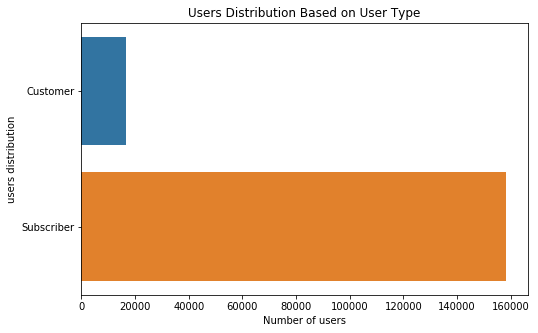

In [33]:
plt.figure(figsize=[8,5])
sb.countplot(data=df_ford, y="user_type")

plt.ylabel("users distribution")
plt.xlabel("Number of users")
plt.title("Users Distribution Based on User Type")

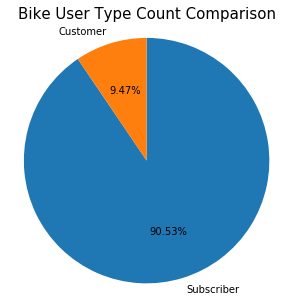

In [34]:
# show user type by percentage
plt.figure(figsize=(10,5))
sorted_counts = df_ford['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 90,
        counterclock = False, autopct='%1.2f%%');
plt.axis('square')
plt.title('Bike User Type Count Comparison', fontsize=15);

**From the chart above, we can see that majority of users are subscriber**

### Question 4: What is the distribution for trip duration in minutes?

Text(0.5,1,'Trip duration in minutes')

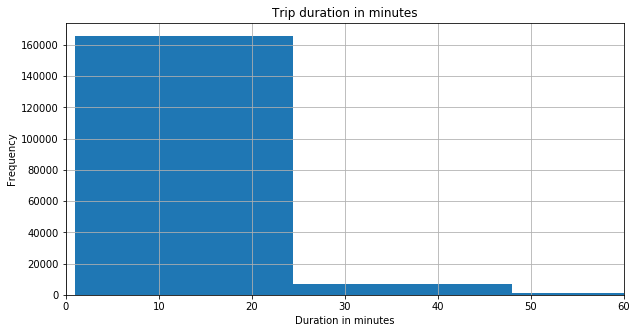

In [35]:
plt.figure(figsize = [10,5])

df_ford['duration_mins'].hist(bins=60)
plt.xlim(0, 60)
plt.xlabel('Duration in minutes')
plt.ylabel('Frequency')
plt.title("Trip duration in minutes")

#### From the chart above, majority of the users trip for less than 30 minutes

### Question 5: What is the distribution of gender?

Text(0.5,1,'Customers distribution based on Gender')

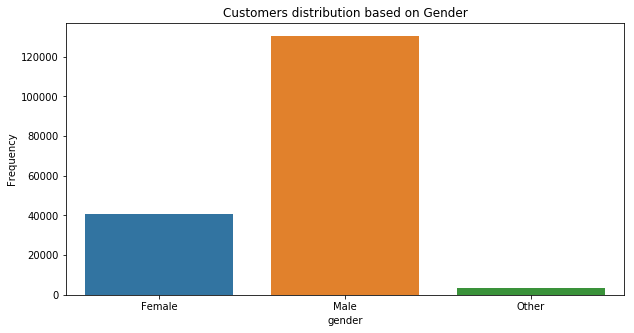

In [36]:
plt.figure(figsize = [10,5])
plot = sb.countplot(data=df_ford, x='member_gender')
plt.xlabel('gender')
plt.ylabel('Frequency')
plt.title("Customers distribution based on Gender")


#### From the above visualization, there are more male users than females

### Question 6: What is the distribution of trip duration in hours?

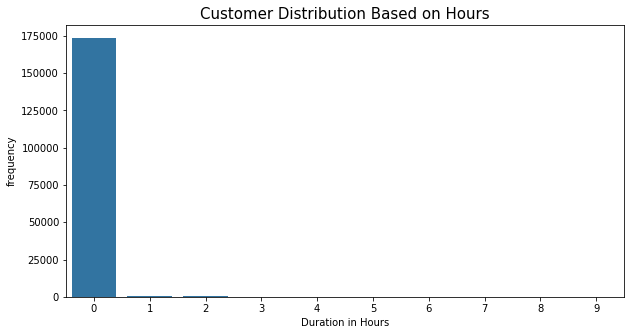

In [37]:
hour_order = np.arange(0,10)
base_color = sb.color_palette()[0]    

plt.figure(figsize=(10,5))
plt.title('Customer Distribution Based on Hours', fontsize=15)
sb.countplot(data=df_ford, x='duration_hrs', order=hour_order, color=base_color)

plt.ylabel('frequency')
plt.xlabel('Duration in Hours');

**From the chart above, most of the users spend less than an hour on the trip**

### Question 7: What are the top 10 end stations?

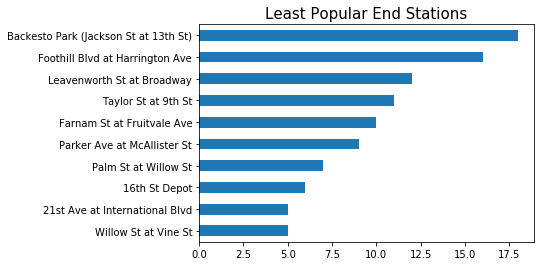

In [38]:
color_base = sb.color_palette()[0]
plt.title('Least Popular End Stations', fontsize=15)
df_ford.end_station_name.value_counts(ascending=True).head(10).plot.barh(color=color_base);

**Users often make use of these end stations for their trips**

### Question 8: What are the top 10 start stations?

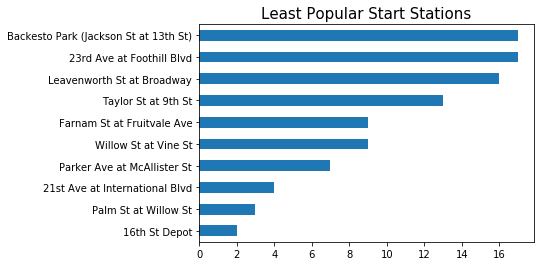

In [39]:
color_base = sb.color_palette()[0]
plt.title('Least Popular Start Stations', fontsize=15)
df_ford.start_station_name.value_counts(ascending=True).head(10).plot.barh(color=color_base);

**Users often make use of these start stations above**

### Question 9: Do users' ages have outliers?

##### To check for outliers will use box plot

Text(0.5,1,"User's distribution by Age")

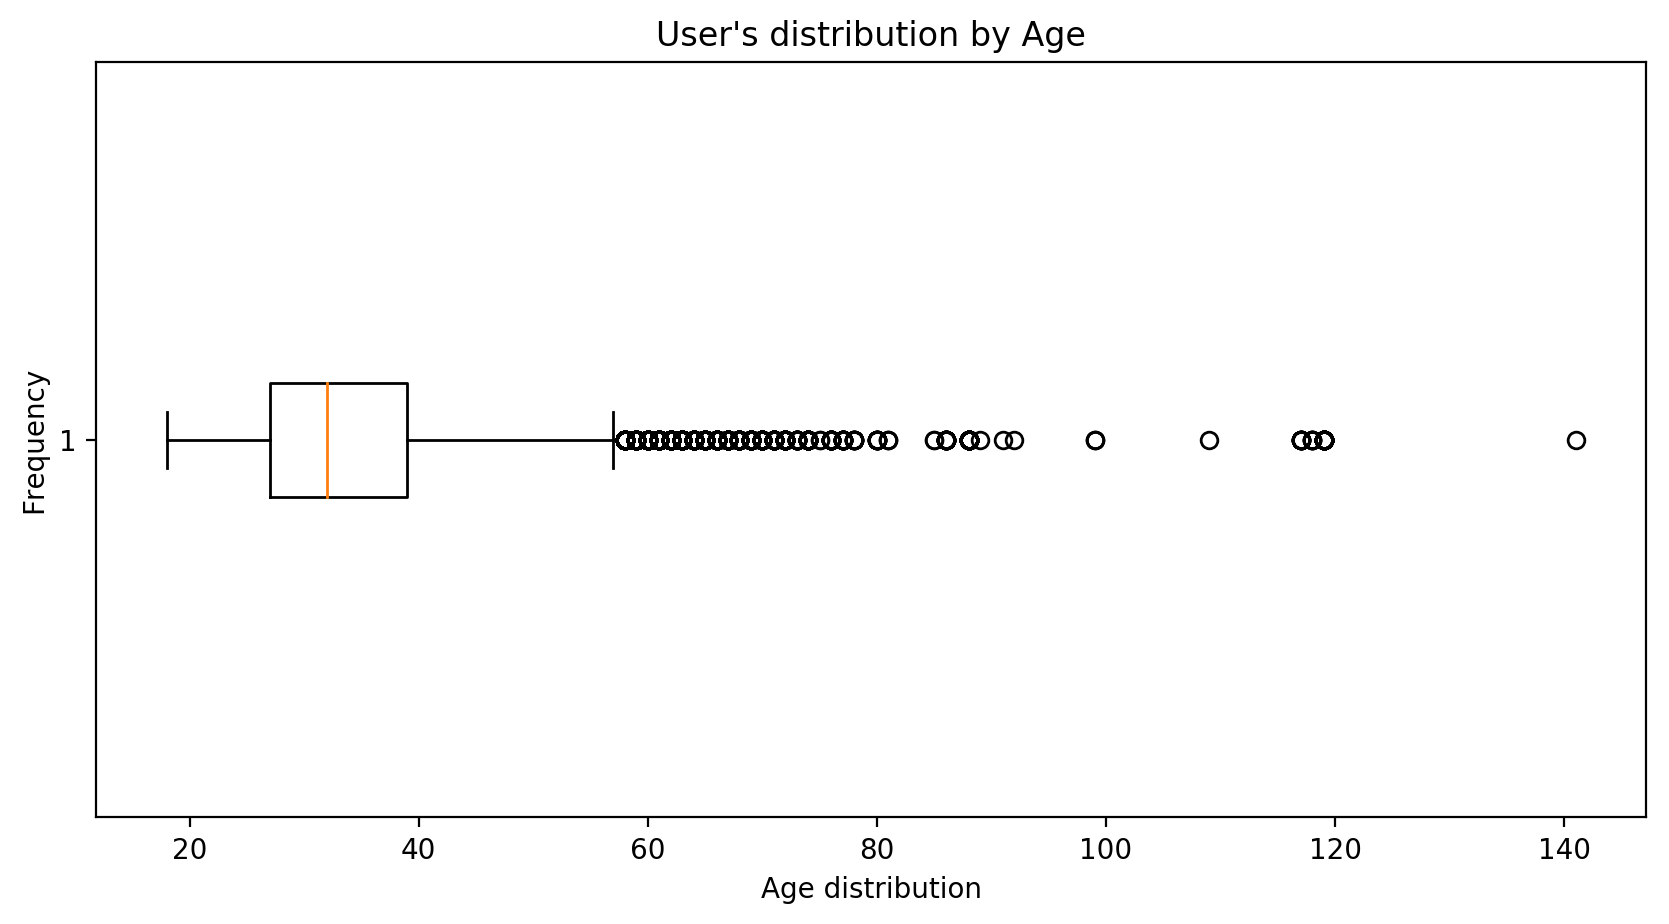

In [40]:
plt.figure(figsize = (10,5), dpi = 200)

plt.boxplot(df_ford['age'], vert=False)

plt.xlabel('Age distribution')
plt.ylabel('Frequency')
plt.title("User's distribution by Age")


**We can see we have an outlier for users' age over 140years old**

**Although this chat should be under bivariant exploration**

## Bivariate Exploration

### Question 10: How long is the duration of the trip for each gender in minutes? 

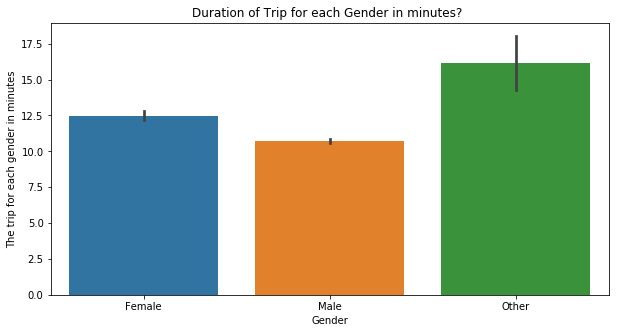

In [41]:
def bivariant_plot_1():
    
    plt.figure(figsize = (10,5))
    sb.barplot(data = df_ford, x = "member_gender", y = "duration_mins")
    plt.xlabel('Gender')
    plt.ylabel('The trip for each gender in minutes')
    plt.title("Duration of Trip for each Gender in minutes? ")
               
bivariant_plot_1()

**Males have shorter trip durations in minutes**

### Question 11:What is the distribution of age for the categories of user type?

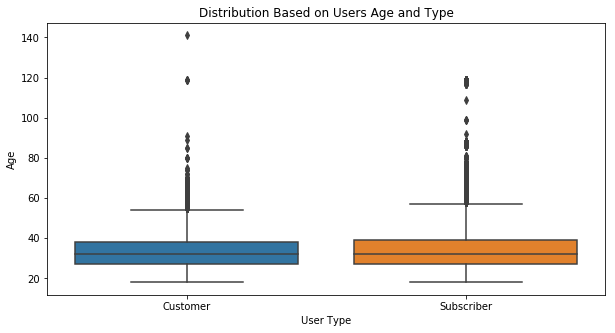

In [48]:
# Distribution of Age by user type

plt.figure(figsize =[10,5])

sb.boxplot(data=df_ford, x = "user_type", y='age')

plt.xlabel('User Type')
plt.ylabel('Age')
plt.title("Distribution Based on Users Age and Type")
plt.show()



**User_type 'customer' have more older users than subscribers** 
**We can see we have users' age over 140years old**

 ### Question 12: How long is the duration of the trip for each user_type in minutes?

Text(0.5,1,'Duration of Trip for each User Type in Minutes? ')

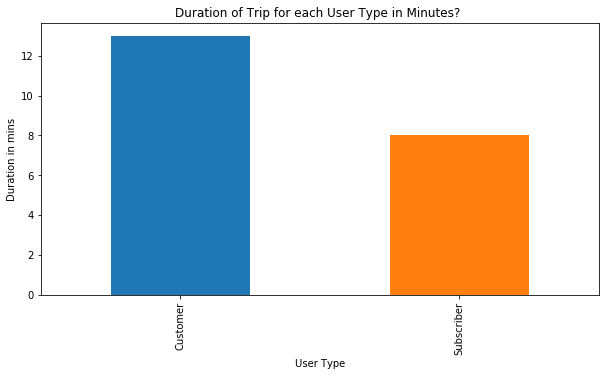

In [43]:
plt.figure(figsize = (10,5))

df_ford.groupby('user_type')['duration_mins'].median().sort_values(ascending=False).plot(kind='bar')

plt.xlabel('User Type')
plt.ylabel('Duration in mins')
plt.title("Duration of Trip for each User Type in Minutes? ")

**User_type customer go for longer trips than user_type subscribers**

### Question 13: How is the distribution based on their age and member_gender ?

Text(0.5,1,'User distribution Based on their Age and member_gender ? ')

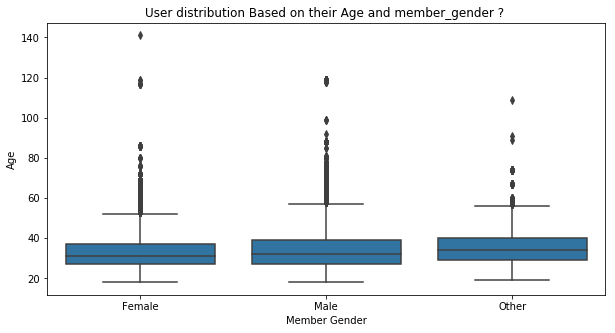

In [44]:
plt.figure(figsize = (10,5))
base_color = sb.color_palette()[0]

sb.boxplot(data=df_ford,x = "member_gender", y = "age", color=base_color)
plt.xlabel('Member Gender')
plt.ylabel('Age')
plt.title("User distribution Based on their Age and member_gender ? ")

**Member gender 'Female' has more older users than other genders**

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>  The user type 'Customer' go on a longer trip than the user type 'Subscriber' where the User type 'Customer' are more than 'Subscriber'

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The female distribution based on their Ages are more than male

> How User_type customer go for longer trips than user_type subscribers.

## Multivariate Exploration

## Question 14: What is the trip duration profile for users over the hours-of-the-day?

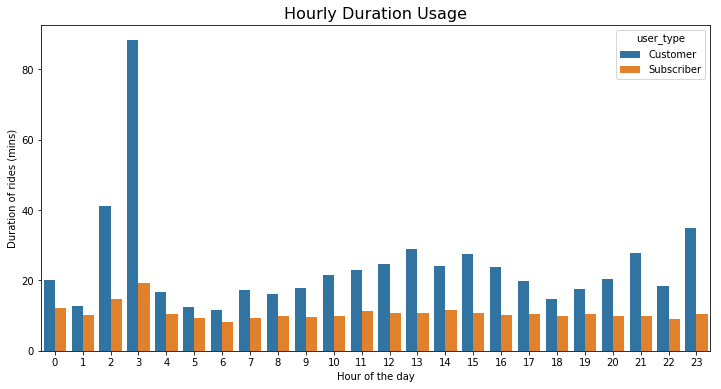

In [45]:
def multivariant_plot_1():
    
    plt.figure(figsize=(12,6))
    sb.barplot(data=df_ford, x='hour', y='duration_mins', ci=None, hue='user_type')

    plt.xlabel('Hour of the day')
    plt.ylabel('Duration of rides (mins)')
    plt.title('Hourly Duration Usage', fontsize=16)
    plt.gca().legend().set_title('user_type')
    
multivariant_plot_1()

**Trip durations by customers are longer around 3 AM** 

## Question 15: What is the trip duration profile over the days of the week:

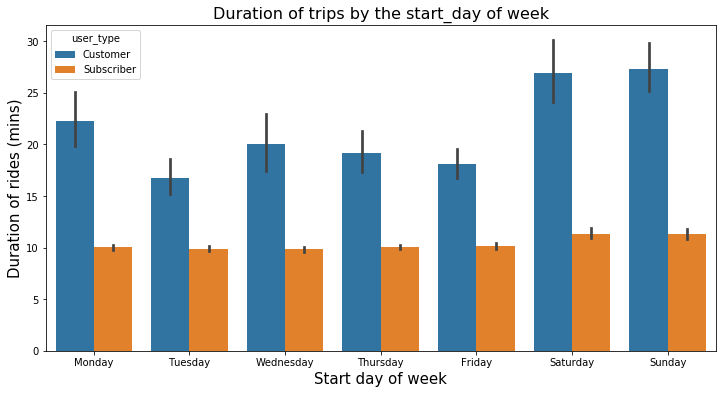

In [46]:
def multivariant_plot_2():
    
    plt.figure(figsize=(12,6))
    weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    weekdaycat = pd.api.types.CategoricalDtype(ordered=True, categories=weekday)
    df_ford['start_day'] = df_ford['start_day'].astype(weekdaycat)

    sb.barplot(data=df_ford, y='duration_mins', x='start_day', order=weekday, hue='user_type')
    plt.xlabel('Start day of week', fontsize=15)
    plt.ylabel('Duration of rides (mins)', fontsize=15)
    plt.title("Duration of trips by the start_day of week", fontsize=16)
    
multivariant_plot_2()

**The clustered barchart above shows a significant higher trip duration during weekend days by Customers.**

**The duration is above 25 minutes during weekend days, which is about 10% higher than the highest score during a weekday**

## Question 16: How does hourly usage vary during a week for Customers and Subscribers?¶

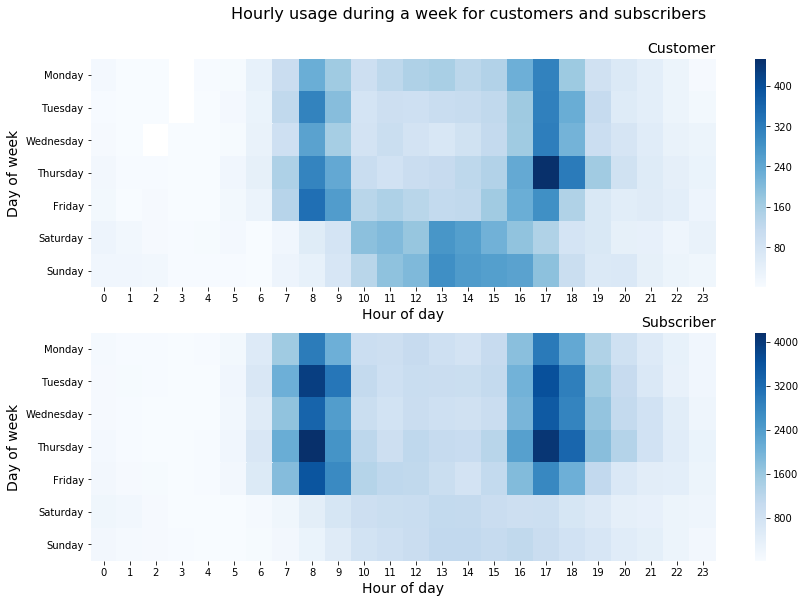

In [47]:
def multivariant_plot_3():
    
    plt.figure(figsize=(14,9))

    plt.subplot(2, 1, 1)
    customers = df_ford.query('user_type == "Customer"')
    ct_counts = customers.groupby(['start_day', 'hour']).size()
    ct_counts = ct_counts.reset_index(name='count')
    ct_counts = ct_counts.pivot(index='start_day', columns='hour', values='count')
    sb.heatmap(ct_counts, cmap="Blues");
    plt.title('Customer', loc='right', fontsize=14);
    plt.xlabel('Hour of day', fontsize=14);
    plt.ylabel('Day of week', fontsize=14);

    plt.subplot(2, 1, 2)
    subscribers = df_ford.query('user_type == "Subscriber"')
    st_counts = subscribers.groupby(['start_day', 'hour']).size()
    st_counts = st_counts.reset_index(name='count')
    st_counts = st_counts.pivot(index='start_day', columns='hour', values='count')
    sb.heatmap(st_counts, cmap="Blues");
    plt.title('Subscriber', loc='right', fontsize=14);
    plt.xlabel('Hour of day', fontsize=14);
    plt.ylabel('Day of week', fontsize=14);

    plt.subplots_adjust(top=0.9)
    plt.suptitle('Hourly usage during a week for customers and subscribers', fontsize=16)

multivariant_plot_3();

**Customers tend to use the bike service during the weekdays around 8am and mostly on Thursdays around 5pm. Then on Saturday/Sunday from 1 PM to 4 PM, while Subscribers will likely have a trip from Monday to Friday around8 PM & in the evening around 5-6 PM.**

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There was a significant higher trip duration during weekend days by Customers,
> The trip duration is above 25 minutes during weekend days, which is about 10% higher than the highest score during a weekday

> Customers tend to use the bike service during the weekdays around 8am and mostly on Thursdays around 5pm. Then on Saturday/Sunday from 1 PM to 4 PM, while Subscribers will likely have a trip from Monday to Friday around8 PM & in the evening around 5-6 PM.

### Were there any interesting or surprising interactions between features?

> It's kind of surprising that average duration at 3.00 AM is most high than in other hour for customers

## Conclusions

Having explored and wrangled the dataset, then used some charts to make some visualization, some of these findings were deducted:

Most users were Male.

Most users were subscriber's in the trip program.

The distribution of duration was strange as the minutes and the hour charts were 30 minutes or less for most users.

The female distribution based on their Age were more than males.

There was a significant higher trip duration during weekend days by Customers

 Average duration at 3.00 AM is most high than in other hour for customers
 
Customers tend to use the bike service during the weekdays around 8am and mostly on Thursdays around 5pm. Then on Saturday/Sunday from 1 PM to 4 PM, while Subscribers will likely have a trip from Monday to Friday around8 PM & in the evening around 5-6 PM.




## Limitations

We got missing data which some of them were fixed.

We got Age outliers for some users being more than 100 years old.